In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("../data/raw/koi_cumulative.csv")
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,koi_sage,koi_sage_err1,koi_sage_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-0.078,0.961,0.110,-0.121,NaN,NaN,NaN,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-0.067,0.836,0.093,-0.077,NaN,NaN,NaN,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-0.133,1.095,0.151,-0.136,NaN,NaN,NaN,288.75488,48.226200,15.509


In [3]:
df.shape

(9564, 62)

In [4]:
# Remove 'koi_pdisposition' column
df = df.drop(['koi_pdisposition'], axis=1)

In [5]:
df.shape

(9564, 61)

In [6]:
df.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_score',
       'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_eccen', 'koi_eccen_err1',
       'koi_eccen_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_num_transits',
       'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_smet', 'koi_smet_err1', 'koi_smet_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'koi_smass', 'koi_smass_err1',
       'koi_smass_e

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 61 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2745 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_score          8054 non-null   float64
 5   koi_fpflag_nt      9564 non-null   int64  
 6   koi_fpflag_ss      9564 non-null   int64  
 7   koi_fpflag_co      9564 non-null   int64  
 8   koi_fpflag_ec      9564 non-null   int64  
 9   koi_period         9564 non-null   float64
 10  koi_period_err1    9110 non-null   float64
 11  koi_period_err2    9110 non-null   float64
 12  koi_time0bk        9564 non-null   float64
 13  koi_time0bk_err1   9110 non-null   float64
 14  koi_time0bk_err2   9110 non-null   float64
 15  koi_eccen          9201 non-null   float64
 16  koi_eccen_err1     0 non

In [8]:
df.describe()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,koi_sage,koi_sage_err1,koi_sage_err2,ra,dec,koi_kepmag
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,...,9096.000000,9201.000000,9096.000000,9096.000000,0.0,0.0,0.0,9564.000000,9564.000000,9563.000000
mean,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,166.183251,...,-0.394806,1.023706,0.122801,-0.138824,NaN,NaN,NaN,292.060163,43.810433,14.264606
std,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008236,0.008243,67.918960,...,2.168213,0.349447,0.085946,0.178983,NaN,NaN,NaN,4.766657,3.601243,1.385448
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.173000,120.515914,...,-116.137000,0.000000,0.000000,-2.432000,NaN,NaN,NaN,279.852720,36.577381,6.966000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,...,-0.250000,0.845000,0.072000,-0.141000,NaN,NaN,NaN,288.660770,40.777173,13.440000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,...,-0.111000,0.974000,0.106000,-0.097500,NaN,NaN,NaN,292.261125,43.677504,14.520000
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,...,-0.069000,1.101000,0.151000,-0.061000,NaN,NaN,NaN,295.859160,46.714611,15.322000
max,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,1472.522306,...,0.000000,3.735000,1.500000,0.000000,NaN,NaN,NaN,301.720760,52.336010,20.003000


In [9]:
# Check for missing values
df.isnull().sum()

kepid                 0
kepoi_name            0
kepler_name        6819
koi_disposition       0
koi_score          1510
                   ... 
koi_sage_err1      9564
koi_sage_err2      9564
ra                    0
dec                   0
koi_kepmag            1
Length: 61, dtype: int64

In [10]:
df.isnull().sum().sum()

91890

In [11]:
# handling missing values based on feature importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [12]:
# 'koi_disposition' is the taget column here
X = df.drop('koi_disposition', axis=1)
y = df['koi_disposition']

# Identify non-numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols

Index(['kepoi_name', 'kepler_name', 'koi_tce_delivname'], dtype='object')

In [13]:
# Apply Label Encoding to non-numerical columns
for col in categorical_cols:
  le = LabelEncoder()
  X[col] = le.fit_transform(X[col])

In [14]:
# recheck the data type of categorical columns now
for col in categorical_cols:
  print(f"{col}: {X[col].dtype}")

kepoi_name: int64
kepler_name: int64
koi_tce_delivname: int64


In [15]:
# Select numerical features for scaling
numerical_features = X.select_dtypes(include=['number']).columns
X_numerical = X[numerical_features]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)
X_scaled = pd.DataFrame(X_scaled, columns=numerical_features, index=X.index)

# Replace original numerical features with scaled features
X[numerical_features] = X_scaled


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [16]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [17]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_names.shape

(60,)

In [18]:
# Set thresholds
importance_threshold = 0.05
missing_value_threshold = 0.1

In [19]:
# Create a DataFrame of feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

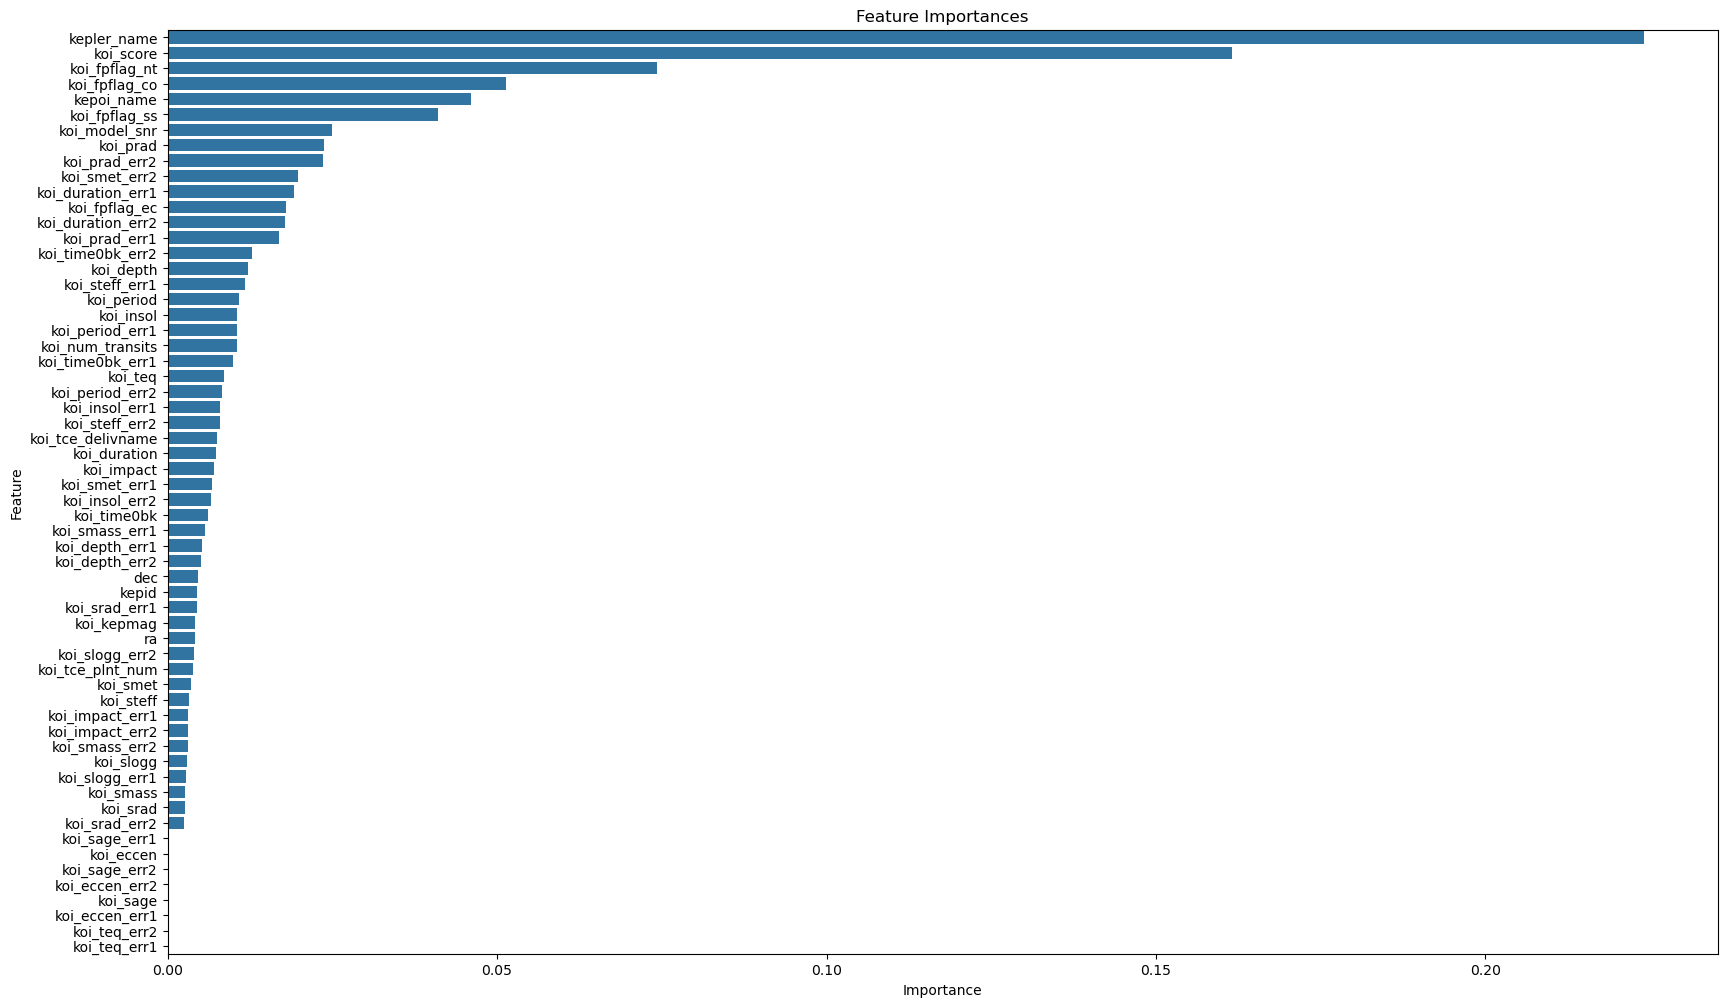

In [20]:
# Plot feature importances
plt.figure(figsize=(20, 12))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

In [21]:
importance_df.head(10)

,Feature,Importance
2,kepler_name,0.224045
3,koi_score,0.161557
4,koi_fpflag_nt,0.074303
6,koi_fpflag_co,0.051389
1,kepoi_name,0.046085
5,koi_fpflag_ss,0.040970
35,koi_model_snr,0.024891
26,koi_prad,0.023747
28,koi_prad_err2,0.023642
47,koi_smet_err2,0.019794


In [22]:
# Select features with importance above a threshold (0.05)
selected_features = importance_df[importance_df['Importance'] > 0.035]['Feature'].tolist()

# Create a new DataFrame with selected features
X_selected = X[selected_features]

In [23]:
# Check for missing values in selected features
missing_values = X_selected.isnull().sum()
print(missing_values[missing_values > 0])

koi_score    1510
dtype: int64


In [24]:
from sklearn.impute import KNNImputer

# Create KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the imputer on your selected features
X_selected_imputed = imputer.fit_transform(X_selected)

# Convert the imputed array back to a DataFrame
X_selected_imputed = pd.DataFrame(X_selected_imputed, columns=X_selected.columns, index=X_selected.index)

In [25]:
X_selected_imputed

,kepler_name,koi_score,koi_fpflag_nt,koi_fpflag_co,kepoi_name,koi_fpflag_ss
0,-1.217471,1.088639,-0.043758,-0.496109,-1.340691,-0.550774
1,-1.216142,1.023635,-0.043758,-0.496109,-1.340329,-0.550774
2,0.523805,-1.008242,-0.043758,-0.496109,-1.339967,-0.550774
3,0.523805,-1.008242,-0.043758,-0.496109,-1.339605,1.815626
4,-0.065039,1.088639,-0.043758,-0.496109,-1.339243,-0.550774
...,...,...,...,...,...,...
9559,0.523805,-1.008242,-0.043758,2.015688,1.618138,1.815626
9560,0.523805,0.033908,-0.043758,-0.496109,1.618500,-0.550774
9561,0.523805,-0.964207,-0.043758,2.015688,1.618863,-0.550774
9562,0.523805,-0.815329,-0.043758,-0.496109,1.619225,-0.550774


In [26]:
# Update the original DataFrame (X) with the imputed values for the selected features
X[selected_features] = X_selected_imputed

In [27]:
missing_values = X_selected_imputed.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_imputed, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()  # Or your chosen model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9796131730266597


In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
}

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

In [30]:
best_model

RandomForestClassifier(max_depth=10, n_estimators=300)

In [31]:
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9811813904861474


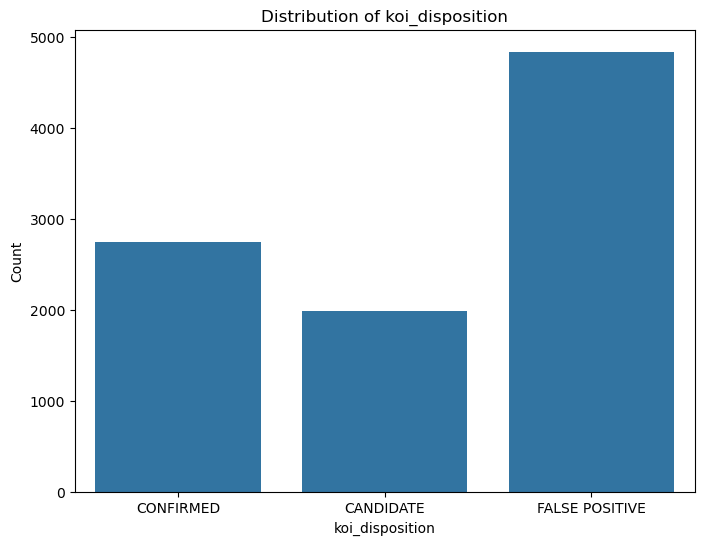

In [32]:
# Countplot for 'koi_disposition' -> target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='koi_disposition', data=df)
plt.title('Distribution of koi_disposition')
plt.xlabel('koi_disposition')
plt.ylabel('Count')
plt.show()

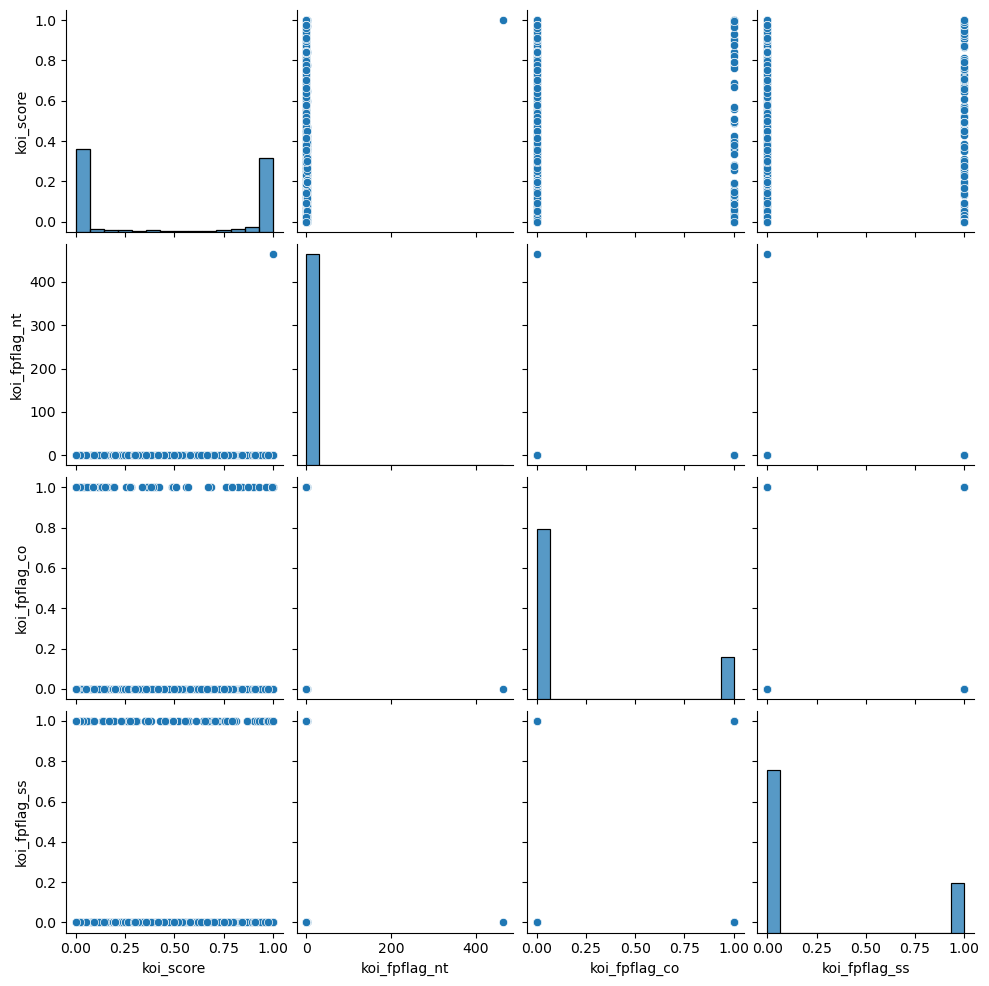

In [33]:
# Scatter plots for relationships between numerical features
sns.pairplot(df[selected_features])
plt.show()

In [34]:
# import joblib

# # Load the model from the file
# loaded_model = joblib.load('trained_exoplanet_model.pkl')

# # Now you can use loaded_model to make predictions
# # For example:
# # predictions = loaded_model.predict(new_data)

In [35]:
import joblib

# Save the model to a file
filename = 'trained_exoplanet_model.pkl'
joblib.dump(best_model, filename)

['trained_exoplanet_model.pkl']